In [2]:
from Bio import SeqIO
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np
import re
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Convert DNA sequences to a numpy array
def string_to_array(seq_string):
    seq_string = seq_string.lower()
    seq_string = re.sub('[^acgt]', 'n', seq_string)
    seq_array = np.array(list(seq_string))
    return seq_array

In [3]:
#Initialize a label encoder for DNA characters
label_encoder = LabelEncoder()
label_encoder.fit(np.array(['a','c','g','t','z']))

LabelEncoder()

In [ ]:
#Convert characters to ordinal encoding
def ordinal_encoder(dna_array):
    integer_encoded = label_encoder.transform(dna_array)
    float_encoded = integer_encoded.astype(float)
    float_encoded[float_encoded == 0] = 0.25
    float_encoded[float_encoded == 1] = 0.50 
    float_encoded[float_encoded == 2] = 0.75 
    float_encoded[float_encoded == 3] = 1.00 
    float_encoded[float_encoded == 4] = 0.00 
    return float_encoded

In [ ]:
#Apply one hot encoding
def one_hot_encoder(seq_string):
    int_encoded = label_encoder.transform(seq_string)
    onehot_encoder = OneHotEncoder(sparse=False, dtype=int)
    int_encoded = int_encoded.reshape(len(int_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(int_encoded)
    onehot_encoded = np.delete(onehot_encoded, -1, 1)
    return onehot_encoded

In [4]:
#Generate k mers from a sequence
def Kmers_funct(seq, size):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

In [ ]:
mySeq1 = 'CTCACCTGTACAATCACACCCCATGTGC'
mySeq2 = 'GGTTCAGTGACCCAGGTGACCAGACAGG'

In [ ]:
#Convert sequences to a space-separated string of k-mers
sentence1 = ' '.join(Kmers_funct(mySeq1, size=10))
sentence2 = ' '.join(Kmers_funct(mySeq2, size=10))

In [5]:
#Use CountVectorizer to convert text data into sparse matrix
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform([sentence1, sentence2]).toarray()

In [ ]:
#Plot data distribution
def plot_dna_data(file_path, title_color):
    dna_data = pd.read_table(file_path)
    plt.figure()
    dna_data['class'].value_counts().sort_index().plot.bar(color=title_color)
    plt.title(f"{os.path.basename(file_path)} DNA", fontsize=16)
    plt.show()
    return dna_data

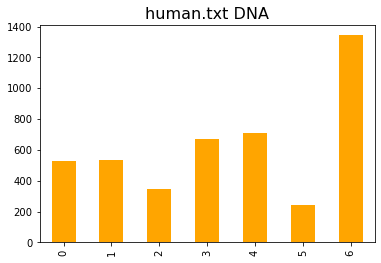

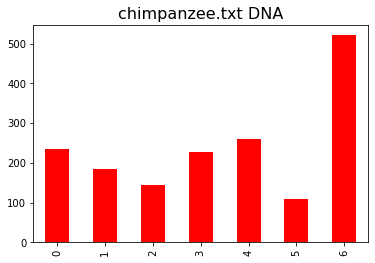

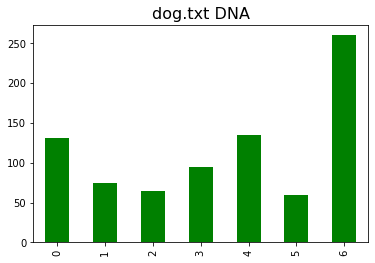

In [6]:
human_dna = plot_dna_data('../input/dna-sequence-dataset/human.txt', 'orange')
chimp_dna = plot_dna_data('../input/dna-sequence-dataset/chimpanzee.txt', 'red')
dog_dna = plot_dna_data('../input/dna-sequence-dataset/dog.txt', 'green')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
#Extract features and target labels and apply Naive Bayes
def prepare_data_and_train(dna_data, species_name):
    texts = [' '.join(Kmers_funct(seq, size=6)) for seq in dna_data['sequence']]
    labels = dna_data['class'].values
    X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.20, random_state=42)
    cv = CountVectorizer(ngram_range=(4,4))
    X_train_cv = cv.fit_transform(X_train)
    X_test_cv = cv.transform(X_test)
    classifier = MultinomialNB(alpha=0.1)
    classifier.fit(X_train_cv, y_train)
    y_pred = classifier.predict(X_test_cv)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    print(f"{species_name} - Accuracy: {accuracy:.3f}, Precision: {precision:.3f}")


In [7]:
#Apply training and evaluation for each species
prepare_data_and_train(human_dna, "Human")
prepare_data_and_train(chimp_dna, "Chimpanzee")
prepare_data_and_train(dog_dna, "Dog")


Human - Accuracy: 0.984, Precision: 0.984
Chimpanzee - Accuracy: 0.917, Precision: 0.925
Dog - Accuracy: 0.665, Precision: 0.771
